# Game of Life and other cellular automatons

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib nbagg
from matplotlib import animation, rc, cm
import IPython, io, urllib
rc('animation', html='html5')

## Introduction

This notebook was inspired by the great video proposed by David Louapre available on his Youtube channel *"Science Etonnante"*:

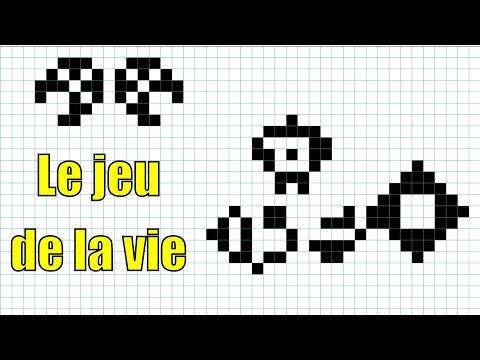

In [2]:
IPython.display.YouTubeVideo('S-W0NX97DB0')

The **Game of Life (GoL)** is a good way to learn about the use of object oriented programming, numpy and matplotlib. It is also a very interresting scientific and mathematical problem. The GoL belongs to the wider group of problems called **Cellular Automatons**. A lot of alternative sets of interresting rules have been created/discovered over time since the invention of the GoL. In this tutorial, we introduce a simple class that can solve all those problems called **Life Like Cellular Automatons (LLCA)**. 

Further readings:

* https://en.wikipedia.org/wiki/Life-like_cellular_automaton

## A generic class to simulate LLCAs

In [4]:
class LLCA:
    """
    A Life Like Cellular Automaton (LLCA)
    
    Inputs:
    * C: a binary matrix representing the cells where 1 stands for alive and 0 for dead.
    * rule: the rule of the in the format 'BXSY' where X and Y are the birth and survival conditions. 
            Example: GOL rule is "B3S23".
    """
    def __init__(self, C = np.random.rand(50, 50), rule = "B3S23"):
        self.C = np.array(C).astype(np.int64)
        self.rule = rule
                
    def neighbors(self):
        """
        Returns the number of living neigbors of each cell.
        """
        C = self.C
        N = np.zeros_like(C) # Neighbors matrix
        N[:-1, :  ]  += C[1:  , :  ] # Living cells south
        N[:  , :-1]  += C[ :  ,1:  ] # Living cells east
        N[1: , :  ]  += C[ :-1, :  ] # Living cells north
        N[:  ,1:  ]  += C[ :  , :-1] # Living cells west
        N[:-1, :-1]  += C[1:  ,1:  ] # Living cells south east
        N[1: , :-1]  += C[ :-1,1:  ] # Living cells north east
        N[1: , 1: ]  += C[ :-1, :-1] # Living cells north west
        N[:-1, 1: ]  += C[1:  , :-1] # Living cells south west
        return N
    
    def iterate(self):
        """
        Iterates one time.
        """
        r = self.rule.upper().split("S") 
        B = np.array([int(i) for i in r[0][1:] ]).astype(np.int64)
        S = np.array([int(i) for i in r[1] ]).astype(np.int64)
        C0 = self.C
        C = np.zeros_like(C0)
        N = self.neighbors()
        for b in B:
            C += np.where( (C0 == 0) & (N == b), 1, 0) # Birth
        for s in S:
            C += np.where( (C0 == 1) & (N == s), 1, 0) # Survival
        C = np.where(C==0, 0, 1)
        self.C = C 
        
        
        

## A starting point

<IPython.core.display.Javascript object>


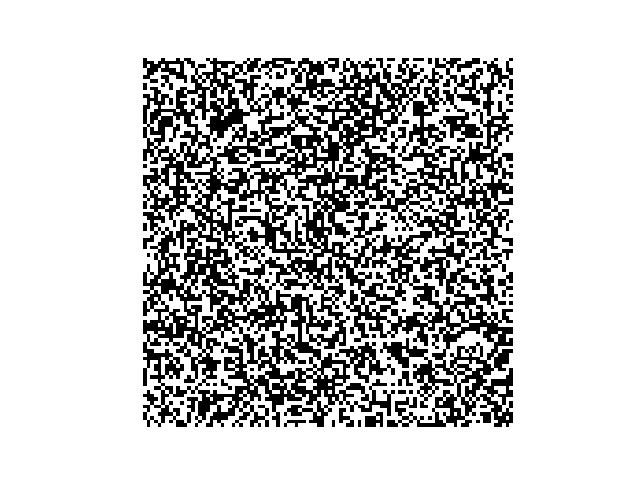

In [94]:
N = 100
C0 = (np.random.rand(N, N) >.5) * 1
fig, ax = plt.subplots()
ax.axis('off')
plt.imshow(C0, cmap = cm.gray)
plt.show()

## Game of Life : B3S23

<IPython.core.display.Javascript object>


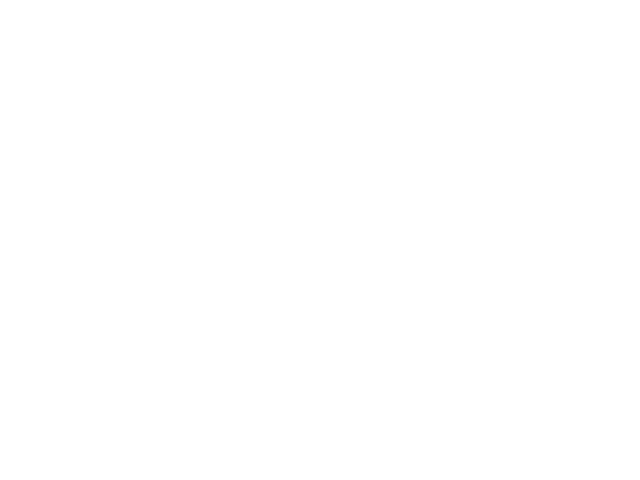

In [96]:
g = LLCA(C0, rule = "B3S23") # B2S23 means Birth if 2 living neighbours and survival if 2 or 3 living neighbours

def updatefig(*args):
    g.iterate()
    im.set_array(g.C)
    return im,


fig, ax = plt.subplots()
ax.axis('off')
im = plt.imshow(g.C, interpolation = "nearest", cmap = cm.gray, animated=True)
anim = animation.FuncAnimation(fig, updatefig, frames=200, interval=50, blit=True)
plt.close()
anim
#plt.show()


## Alternative rule:  Day and Night B3678S34678

<IPython.core.display.Javascript object>


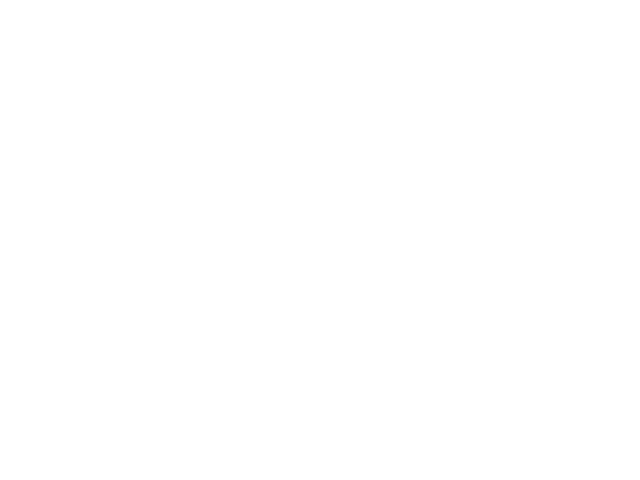

In [97]:
g = LLCA(C0, rule = "B3678S34678") 

def updatefig(*args):
    g.iterate()
    im.set_array(g.C)
    return im,


fig, ax = plt.subplots()
ax.axis('off')
im = plt.imshow(g.C, interpolation = "nearest", cmap = cm.gray, animated=True)
anim = animation.FuncAnimation(fig, updatefig, frames=200, interval=40, blit=True)
plt.close()
anim
#plt.show()


## Existing structures in GoL 

Let's simulate an existing puffer:

http://www.conwaylife.com/patterns/hivenudger2_106.lif

<IPython.core.display.Javascript object>


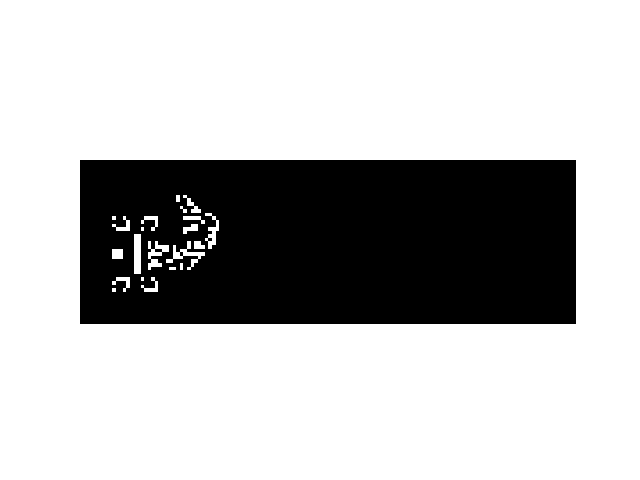

In [98]:
def life_parser(path, bottom_margin = 10, top_margin = 10, left_margin = 10, right_margin = 10):
    """
    A life 1.06 file parser
    
    http://www.conwaylife.com/wiki/Life_1.06
    """
    data = "".join([l for l in open(path).readlines() if not l.startswith("#")])
    data = pd.read_csv(io.StringIO(data), header = None, sep = " ").values
    xmin, xmax = data[:,0].min(), data[:,0].max()
    ymin, ymax = data[:,1].min(), data[:,1].max()
    C0 = np.zeros( (xmax - xmin + top_margin + bottom_margin, 
                    ymax - ymin + left_margin + right_margin) )
    data[:,0] += -xmin + top_margin
    data[:,1] += -ymin + left_margin
    C0[data[:,0] , data[:,1]] = 1
    return C0 

path = "data/hivenudger2_106.lif"
C0 = life_parser(path, top_margin = 100).T[:, ::-1]
fig, ax = plt.subplots()
plt.imshow(C0, cmap = cm.gray)
ax.axis('off')
plt.show()


<IPython.core.display.Javascript object>


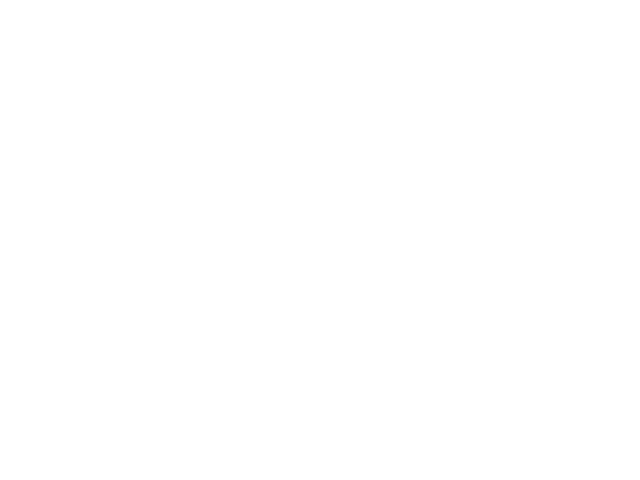

In [92]:
g = LLCA(C0, rule = "B3S23") # B2S23 means Birth if 2 living neighbours and survival if 2 or 3 living neighbours

def updatefig(*args):
    g.iterate()
    im.set_array(g.C)
    return im,

fig, ax = plt.subplots()
im = plt.imshow(g.C, interpolation = "nearest", cmap = cm.gray, animated=True)
anim = animation.FuncAnimation(fig, updatefig, frames=200, interval=50, blit=True)
ax.axis('off')
plt.close()
anim
#plt.show()